In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [10]:
df = pd.read_excel("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\Yields\\Yield.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-10-01,3.594444,3.857778,4.132222,4.308889,4.485556,4.588889,4.465556,4.471111,4.277778,4.198889,4.117778,4.438889,4.228889
2022-11-01,3.867000,4.141500,4.323000,4.434000,4.611000,4.728000,4.503500,4.336000,4.055500,3.985500,3.891000,4.215500,3.999000
2022-12-01,3.899048,4.226667,4.358095,4.577143,4.708095,4.681905,4.288571,4.046667,3.764286,3.719048,3.616190,3.868095,3.659048
2023-01-01,4.518500,4.601500,4.687500,4.746500,4.803000,4.694000,4.207500,3.913000,3.643000,3.593500,3.531500,3.810500,3.664500
2023-02-01,4.639474,4.759474,4.787895,4.905789,4.965263,4.925263,4.533684,4.234211,3.942105,3.864211,3.746842,3.946316,3.802105
2023-03-01,4.494348,4.680000,4.858696,4.951739,4.993913,4.679130,4.302609,4.085217,3.823478,3.766087,3.663043,3.939130,3.770870
2023-04-01,4.171000,4.966500,5.073500,5.109000,4.992500,4.681000,4.016000,3.758000,3.537000,3.502000,3.460000,3.803000,3.684500
2023-05-01,5.493182,5.192273,5.308182,5.353636,5.266364,4.912727,4.131818,3.820455,3.591364,3.580909,3.573636,3.963636,3.855455
2023-06-01,5.200000,5.307143,5.415714,5.439524,5.420000,5.241429,4.639524,4.266667,3.949524,3.854762,3.748095,4.041905,3.867619


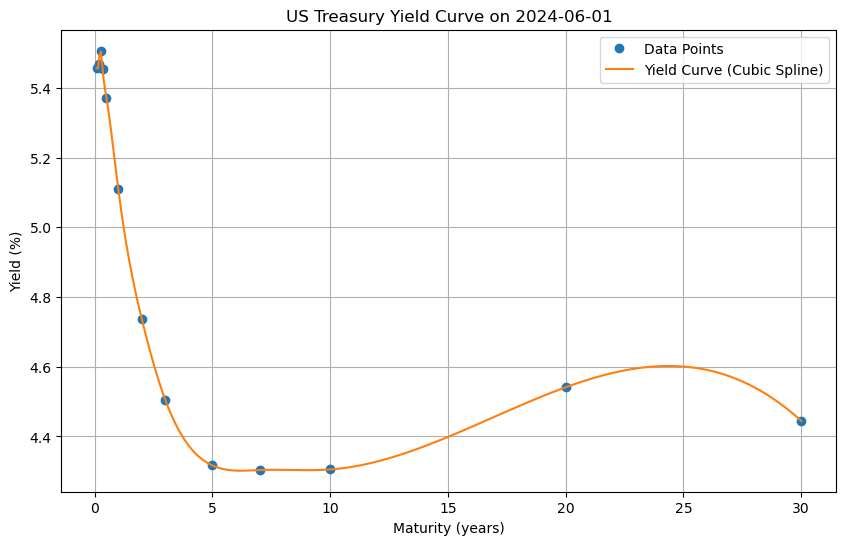

In [11]:
maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])  # Maturities in years

latest_date = df.index.max()
yields_latest = df.loc[latest_date].values #an array

# Create a cubic spline interpolation of the data
cs = CubicSpline(maturities, yields_latest) #creates polynomials for each interval between the observed points and I mean it derives the parameters and all so basically the intervals are modelled as the result of a polynomial specific to the interval

# Generate a range of maturities for plotting the smooth curve
maturities_smooth = np.linspace(min(maturities), max(maturities), 500) #create 500 points between the two values and these points are equally spaced
yields_smooth = cs(maturities_smooth) #pass the points and interpolate them for their respective values

plt.figure(figsize=(10, 6))
plt.plot(maturities, yields_latest, 'o', label='Data Points') #'o' = circle
plt.plot(maturities_smooth, yields_smooth, '-', label='Yield Curve (Cubic Spline)') #plot the interpolated values
plt.title(f'US Treasury Yield Curve on {latest_date.date()}')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

## Now I want to find out the evolution of the yield curve over a few days

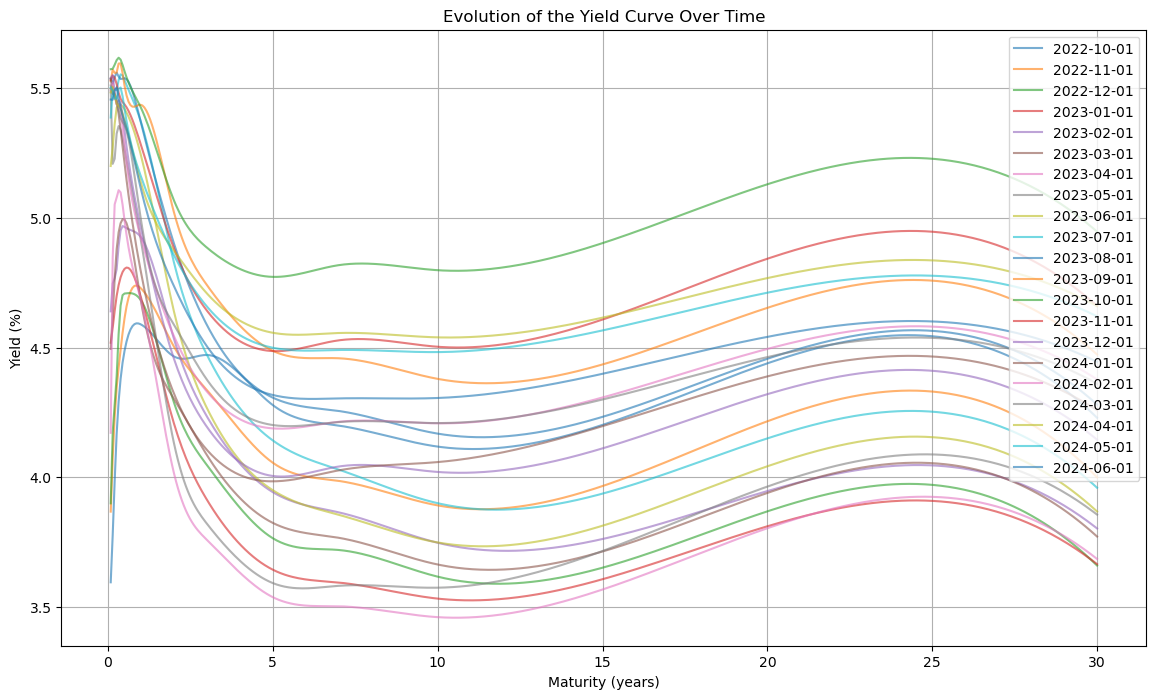

In [12]:
df = pd.read_excel("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\Yields\\Yield.xlsx")

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])  # Maturities in years

plt.figure(figsize=(14, 8))

for date in df.index:
    yields = df.loc[date].values
    cs = CubicSpline(maturities, yields)
    
    # Generate a range of maturities for plotting the smooth curve
    maturities_smooth = np.linspace(min(maturities), max(maturities), 500)
    yields_smooth = cs(maturities_smooth)
    
    # Plot the smooth yield curve for the current date
    plt.plot(maturities_smooth, yields_smooth, label=date.date(), alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.title('Evolution of the Yield Curve Over Time')
plt.legend()
plt.grid(True)
plt.show()
